## Анализ информациии о численности населения.

Анализ предложенного датасета с фактической и прогнозной численностью населения в городах.
Интересны социально-экономические выводы и гипотезы по дальнейшей работе по применению этих знаний в управленческих решениях.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('forFBpost.csv', sep=';')

In [3]:
df.head(100)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
...,...,...,...,...,...,...
95,Белокуриха,2095,NaN,23800.0,23400.0,24200.0
96,Белокуриха,2096,NaN,23900.0,23500.0,24300.0
97,Белокуриха,2097,NaN,24000.0,23600.0,24400.0
98,Белокуриха,2098,NaN,24100.0,23700.0,24400.0


In [4]:
df.describe()

,year,fact,Модель,Нижняя граница,Верхняя граница
count,30250.000000,3.250000e+03,3.025000e+04,3.025000e+04,3.025000e+04
mean,2060.000000,1.271382e+05,1.402168e+05,1.387981e+05,1.417304e+05
std,34.929076,7.675931e+05,8.866193e+05,8.818044e+05,8.914678e+05
min,2000.000000,2.370000e+03,0.000000e+00,0.000000e+00,4.000000e+02
25%,2030.000000,1.583100e+04,1.170000e+04,1.140000e+04,1.200000e+04
50%,2060.000000,3.387500e+04,2.790000e+04,2.740000e+04,2.840000e+04
75%,2090.000000,7.276000e+04,7.410000e+04,7.290000e+04,7.560000e+04
max,2120.000000,1.267808e+07,1.541940e+07,1.530420e+07,1.553550e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  float64
 4   Нижняя граница   30250 non-null  float64
 5   Верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
df.duplicated().sum()

0

Первичное знакомство с датасетом показывает:
-В датасете представлены данные о городах, годах, фактической численности, а так же предсказания моделей и нижняя и верхняя границы предсказаний.
-В таблице в столбце фактическая численность много пропусков.
-Явных дубликатов в таблице нет.
-Наименования столбцов некорректные, так как часть из них на русском, часть на английском языке.
-Диапазон столбца year с 2000 по 2120, но так как в fact много пропусков, скорее всего данные предоставлены за несколько лет.
-В датасете более 75% городов имеют численность населения менее 100 000 человек
-Данные в датасете расположены последовательно

Сначала переименуем названия таблицы

In [7]:
df.rename(columns={'Город': 'city', 'Нижняя граница': 'lower_limit', 'Верхняя граница': 'upper_limit',
                   'Модель': 'prediction'}, inplace=True)
df.head()

,city,year,fact,prediction,lower_limit,upper_limit
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0


In [8]:
df['city'].nunique()

248

В таблице предоставлены данные по 248 городам России.

In [9]:
mean_fact_city = df.groupby('city')['fact'].mean().sort_values()

In [10]:
mean_fact_city

city
Плес             2.976769e+03
Ладушкин         3.996846e+03
Сольвычегодск    4.301077e+03
Мещовск          5.971000e+03
Юхнов            6.000231e+03
                     ...     
Ульяновск        6.407703e+05
Тольятти         7.140153e+05
Краснодар        9.067060e+05
 Уфа             1.099514e+06
Москва           1.202154e+07
Name: fact, Length: 248, dtype: float64

In [11]:
df[~df['fact'].isna()].groupby('year')['fact'].count()

year
2008    250
2009    250
2010    250
2011    250
2012    250
2013    250
2014    250
2015    250
2016    250
2017    250
2018    250
2019    250
2020    250
Name: fact, dtype: int64

Данные о фактической численности представлены с 2008 по 2020 год. Число записей на каждый год = 250, но уникальных городов в датасете 248. Есть 2 города дубликата с разными значениями численности. Обнаружим эти города, чтобы получить только уникальные данные.

In [12]:
df.groupby('city')['fact'].count().sort_values(ascending=False).head()

city
Кировск           26
Краснослободск    26
 Буй              13
Павловск          13
Новокуйбышевск    13
Name: fact, dtype: int64

Кировск и Краснослободск встречаются 2 раза. Посмотрим на данные об этих городах.

In [13]:
df[df['city'] == 'Кировск']

,city,year,fact,prediction,lower_limit,upper_limit
15125,Кировск,2000,NaN,28100.0,27900.0,28300.0
15126,Кировск,2001,NaN,28000.0,27800.0,28200.0
15127,Кировск,2002,NaN,27900.0,27600.0,28100.0
15128,Кировск,2003,NaN,27700.0,27500.0,27900.0
15129,Кировск,2004,NaN,27500.0,27300.0,27800.0
...,...,...,...,...,...,...
17056,Кировск,2116,NaN,13300.0,13000.0,13500.0
17057,Кировск,2117,NaN,13200.0,13000.0,13500.0
17058,Кировск,2118,NaN,13200.0,12900.0,13400.0
17059,Кировск,2119,NaN,13100.0,12900.0,13400.0


В кировске в начале датасета (индексы с 15125 по 15245) - содержат подозрительно одинаковое и округленное значение фактической численности. Оставим наиболее правдоподобные.

In [14]:
df.drop(df.index[15125:15246], inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(30129, 6)

In [15]:
df.groupby('city')['fact'].count().sort_values(ascending=False).head(2)

city
Краснослободск    26
 Буй              13
Name: fact, dtype: int64

Сделаем то же самое для города Краснослободск

In [16]:
df[df['city'] == 'Краснослободск']

,city,year,fact,prediction,lower_limit,upper_limit
4235,Краснослободск,2000,NaN,15700.0,15300.0,16100.0
4236,Краснослободск,2001,NaN,15900.0,15500.0,16200.0
4237,Краснослободск,2002,NaN,16100.0,15700.0,16400.0
4238,Краснослободск,2003,NaN,16300.0,15900.0,16700.0
4239,Краснослободск,2004,NaN,16500.0,16100.0,16800.0
...,...,...,...,...,...,...
27825,Краснослободск,2116,NaN,2500.0,2400.0,2600.0
27826,Краснослободск,2117,NaN,2500.0,2400.0,2600.0
27827,Краснослободск,2118,NaN,2500.0,2300.0,2600.0
27828,Краснослободск,2119,NaN,2500.0,2300.0,2600.0


В данном случае ситуация такова, что население отличается в 2 раза. Проверим в открытых источниках население города. В википедии на основании данных росстат указано, что численность населения этого города за 2020 год составляет 9153. Тюе порядок такой. Оставим нужные строки в датасете.

In [17]:
df.drop(df.index[27709:27830], inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(30008, 6)

In [18]:
df.groupby('city')['fact'].count().sort_values(ascending=False).head(5)

city
 Буй              13
Партизанск        13
Новокуйбышевск    13
Новотроицк        13
Новохопёрск       13
Name: fact, dtype: int64

In [19]:
df[~df['fact'].isna()].groupby('year')['fact'].count()

year
2008    248
2009    248
2010    248
2011    248
2012    248
2013    248
2014    248
2015    248
2016    248
2017    248
2018    248
2019    248
2020    248
Name: fact, dtype: int64

### Анализ городов

Данные по городам предоставлены с 2008 по 2020 год по всем городам.
Более 75% городов имеют численность населения до 100 000 человек.
Исходя из этого посмотрим на распределение численности населения по годам на графике

In [20]:
fact_by_years = df[~df['fact'].isna()].groupby('year')['fact'].sum()
fact_by_years

year
2008    30587493.0
2009    30675314.0
2010    30903213.0
2011    31316523.0
2012    31450675.0
2013    31661459.0
2014    31860690.0
2015    32016139.0
2016    32209240.0
2017    32298505.0
2018    32453350.0
2019    32619127.0
2020    32669251.0
Name: fact, dtype: float64

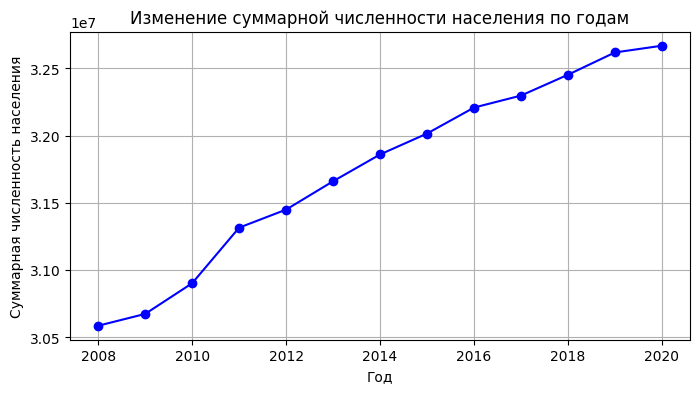

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(fact_by_years.index, fact_by_years.values, marker='o', linestyle='-', color='b')

plt.xlabel('Год')
plt.ylabel('Суммарная численность населения')
plt.title('Изменение суммарной численности населения по годам')

plt.grid(True)
plt.show()

In [22]:
fact_by_years = pd.DataFrame({'fact': fact_by_years, 'last_fact': fact_by_years.shift()})
fact_by_years

,fact,last_fact
year,,
2008,30587493.0,NaN
2009,30675314.0,30587493.0
2010,30903213.0,30675314.0
2011,31316523.0,30903213.0
2012,31450675.0,31316523.0
2013,31661459.0,31450675.0
2014,31860690.0,31661459.0
2015,32016139.0,31860690.0
2016,32209240.0,32016139.0


In [23]:
fact_by_years['percent'] = (fact_by_years['fact']/fact_by_years['last_fact'] - 1)*100

In [24]:
fact_by_years

,fact,last_fact,percent
year,,,
2008,30587493.0,NaN,NaN
2009,30675314.0,30587493.0,0.287114
2010,30903213.0,30675314.0,0.742939
2011,31316523.0,30903213.0,1.337434
2012,31450675.0,31316523.0,0.428375
2013,31661459.0,31450675.0,0.670205
2014,31860690.0,31661459.0,0.629254
2015,32016139.0,31860690.0,0.487902
2016,32209240.0,32016139.0,0.603136


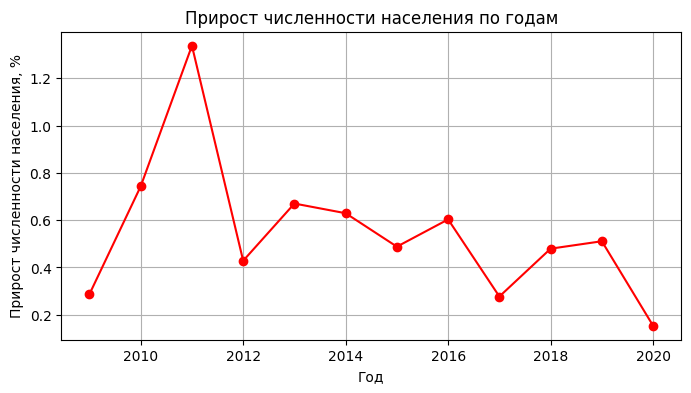

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(fact_by_years.index, fact_by_years['percent'], marker='o', linestyle='-', color='r')

plt.xlabel('Год')
plt.ylabel('Прирост численности населения, %')
plt.title('Прирост численности населения по годам')

plt.grid(True)
plt.show()

За период c 2008 по 2020 года наблюдается ежегодное увеличение общей численности населения в 248 городах c 30,5 млн человек до 32,66 млн человек, то есть за 12 лет на 6,8%. Ежегодный прирост варьируется от 0.2 до 1.3%. Наибольший прирост наблюдался в 2011 году, далее прирост медленно снижается.

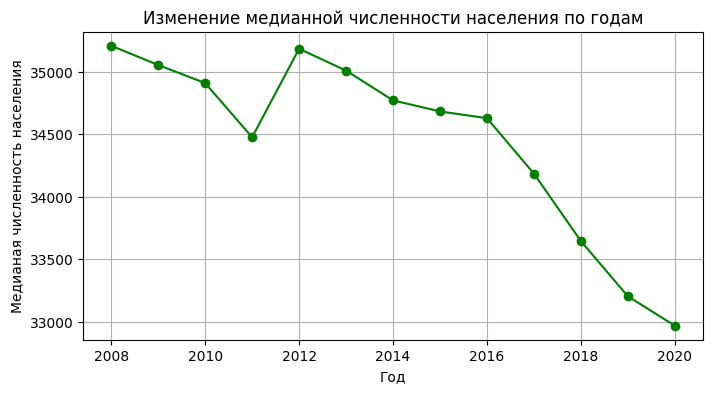

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(df[~df['fact'].isna()].groupby('year')['fact'].median().index, df[~df['fact'].isna()].groupby('year')['fact'].median().values, marker='o', linestyle='-', color='g')

plt.xlabel('Год')
plt.ylabel('Медианая численность населения')
plt.title('Изменение медианной численности населения по годам')

plt.grid(True)
plt.show()

А медианная численность населения падает.
Это может быть связано например с приростом населения в более крупных городах или с оттоком населения из более мелких городов.
Посмотрим, во всех ли городах наблюдается прирост за 12 лет? Для этого поделим города на группы в зависимости от количества по градостроительному кодексу РФ:
до 50 000человек - малые города и поселки
от 50 000 человек до 100 000 человек - средние города,
от 100 000 до 250 000 человек - большие города,
от 250 000 до 1 млн челове - крупнейшие города.

In [27]:
grouped_by_city = df.groupby('city')['fact'].mean()
grouped_by_city

city
 Буй          2.453754e+04
 Оха          2.454877e+04
 Реж          4.798715e+04
 Уфа          1.099514e+06
 Шуя          5.834392e+04
                  ...     
Якутск        3.099498e+05
Ялта          1.368728e+05
Ялуторовск    3.852846e+04
Ярославль     6.033387e+05
Ясногорск     1.611215e+04
Name: fact, Length: 248, dtype: float64

In [28]:
grouped_by_city = grouped_by_city.reset_index()
grouped_by_city

,city,fact
0,Буй,2.453754e+04
1,Оха,2.454877e+04
2,Реж,4.798715e+04
3,Уфа,1.099514e+06
4,Шуя,5.834392e+04
...,...,...
243,Якутск,3.099498e+05
244,Ялта,1.368728e+05
245,Ялуторовск,3.852846e+04
246,Ярославль,6.033387e+05


In [29]:
def get_type(f):
    if f <=50000:
        return 'малый'
    if f <=100000:
        return 'средний'
    if f <=250000:
        return 'большой'
    if f <=1000000:
        return 'крупный'
    return 'крупнейший'

In [30]:
grouped_by_city['type'] = grouped_by_city['fact'].apply(get_type)

In [31]:
grouped_by_city

,city,fact,type
0,Буй,2.453754e+04,малый
1,Оха,2.454877e+04,малый
2,Реж,4.798715e+04,малый
3,Уфа,1.099514e+06,крупнейший
4,Шуя,5.834392e+04,средний
...,...,...,...
243,Якутск,3.099498e+05,крупный
244,Ялта,1.368728e+05,большой
245,Ялуторовск,3.852846e+04,малый
246,Ярославль,6.033387e+05,крупный


Посмотрим на распределение городов по типам на круговой диаграмме

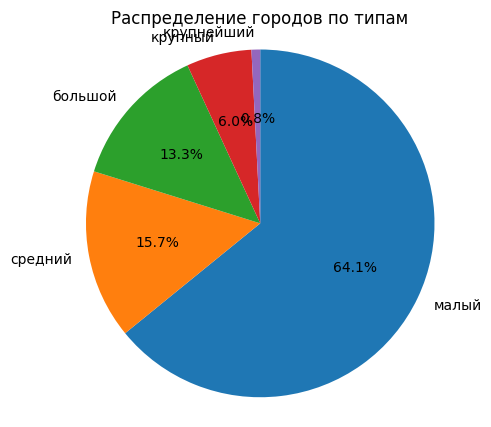

In [32]:
city_types_counts = grouped_by_city['type'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(city_types_counts, labels=city_types_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Распределение городов по типам')
plt.axis('equal')

plt.show()

Малых городов больше всего (64.1%), средних и больших примерно одинаково, а крупных и крупнейших - менее 7 % от общего числа.

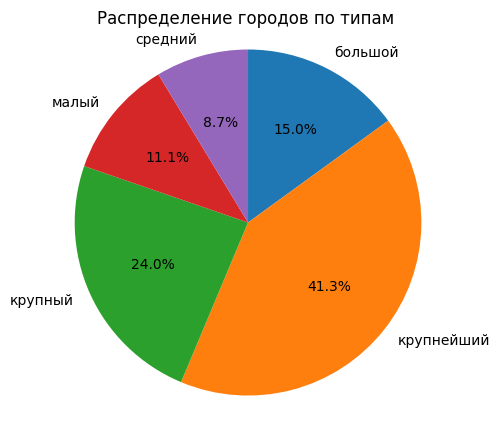

In [33]:
city_types_counts = grouped_by_city.groupby('type')['fact'].sum()

plt.figure(figsize=(5, 5))
plt.pie(city_types_counts, labels=city_types_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Распределение городов по типам')
plt.axis('equal')

plt.show()

А вот по численности населения крупнейшие занимают > 65%, большие и средние около 24%, а малые около 11%.
Посмотрим на численность населения по типам городов.

In [34]:
def get_info(grouped_by_city, type):
    cities = grouped_by_city[grouped_by_city['type'] == type]['city'].unique()
    new_type_df = df[(~df['fact'].isna()) & (df['city'].isin(cities))].groupby('year')['fact'].sum()
    new_type_df = pd.DataFrame({'fact': new_type_df, 'last_fact': new_type_df.shift()})
    new_type_df['percent'] = (new_type_df['fact']/new_type_df['last_fact'] - 1)*100

    plt.figure(figsize=(6, 3))
    plt.plot(new_type_df.index, new_type_df['fact'], marker='o', linestyle='-', color='b')

    plt.xlabel('Год')
    plt.ylabel('Суммарная численность населения')
    plt.title(f'Изменение суммарной численности населения по годам для городов типа {type}')

    plt.figure(figsize=(6, 3))
    plt.plot(new_type_df.index, new_type_df['percent'], marker='o', linestyle='-', color='r')

    plt.xlabel('Год')
    plt.ylabel('Прирост численности населения, %')
    plt.title(f'Прирост численности населения по годам для городов типа {type}')

    plt.grid(True)
    plt.show()

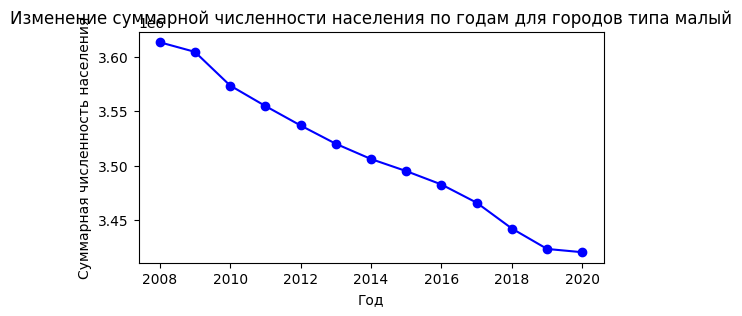

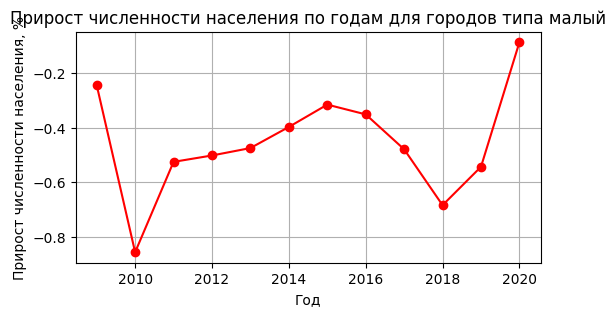

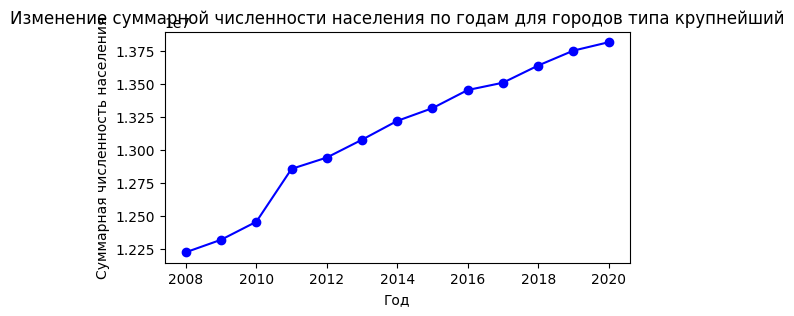

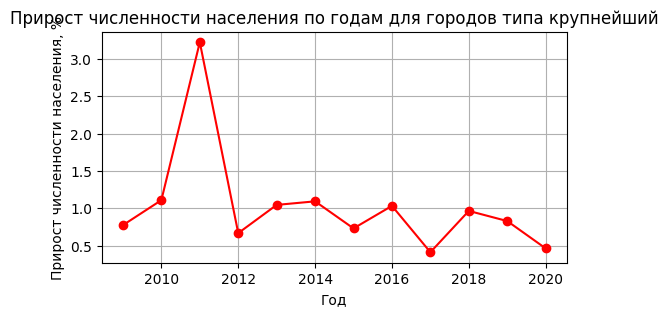

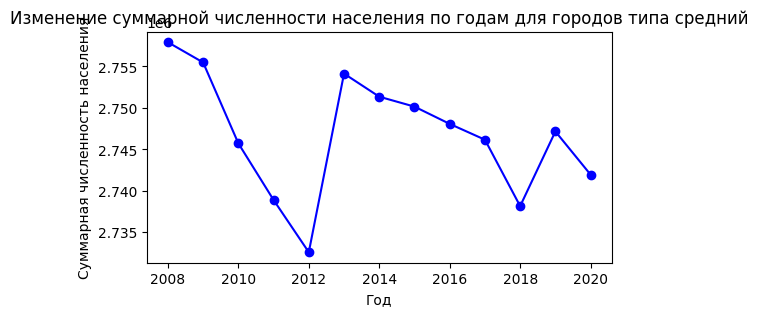

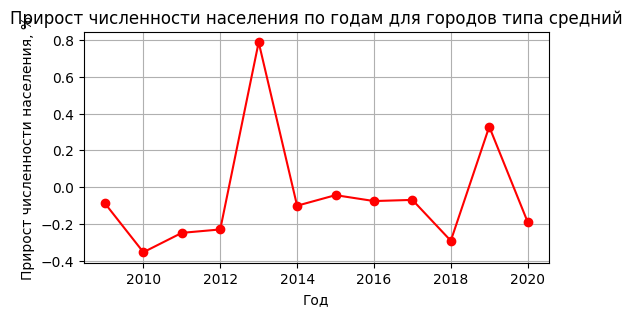

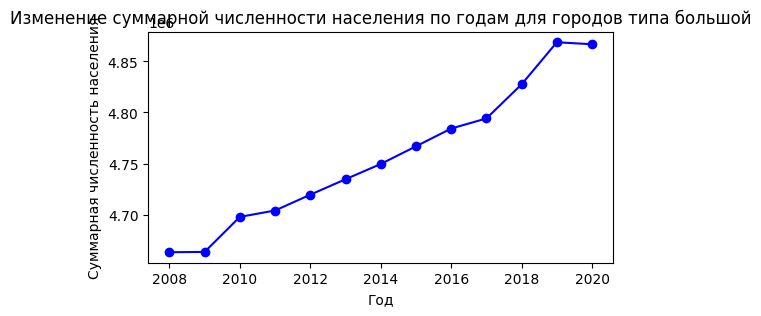

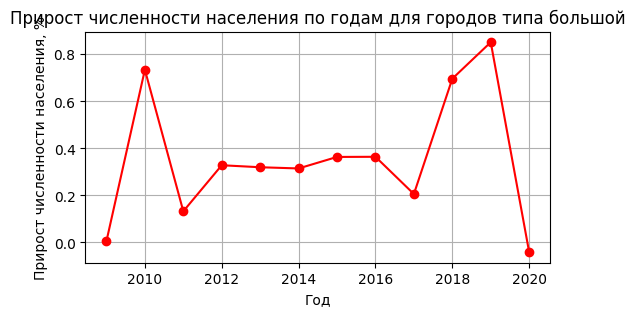

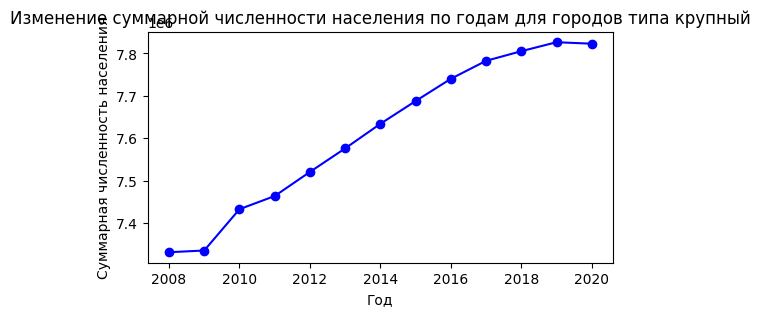

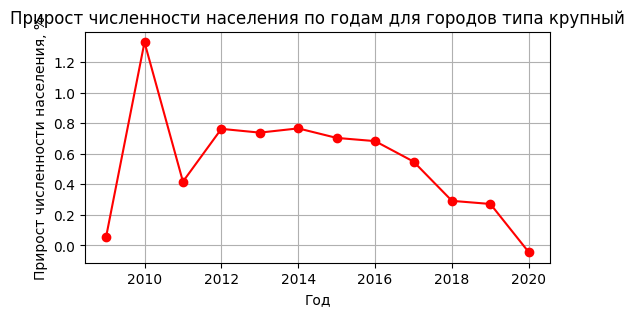

In [35]:
for type in grouped_by_city['type'].unique():
    get_info(grouped_by_city, type)

По графикам видно, что среди малых городов суммарная численность снижается, прирост отрицательный,  кроме 2020 года - присрост стал увеличиваться. В городах типа средний тоже наблюдается тенденция к снижению численности населения, кроме двух пиков положительного прироста - в 2013 и 2019 году, но даже эти пики не вернули общую численность и она продолжает падать.
Среди остальных городов наблюдается увеличение численности населения.
Для крупнейших городов - ежегодный прирост населения около 1%, стабильный, но был скачок в 2011 году (более 3% прирост).
Для крупных городов - прирост в год наблюдался около 0.8%, снижается: в 2020 году уже -0.1%. Были скачки в 2010 году (1.3%) и в 2011 году (0.4%)
Для больших городов - ежегодный прирост около 0.4%, было 3 пика - в 2010, 2018 и 2019 годах до 0.8%. в 2020 году тоже -0.1%

Исходя из доступных нам данных, мы можем сделать несколько гипотез.

1. Люди склонные уезжать из более маленьких городов в более крупные
2. с 2008 по 2020 год наблюдается прирост населения в кол-ве около 2 млн человек. Здесть доступно много гипотез. Возможно, это связано с мигрантами и иностранными гражданами. Либо это неучтенные данные по остальным городам России. Либо повышается рождаемость. Либо понижается смертность. Либо уровень безработицы и наличие рабочих мест.
3. Интересно посмотреть на информацию по возрасту, рождаемости и смертности, чтобы приблизиться к пониманию причин. Возможно более молодые перемещаются между городами, а люди среднего и пожилого возраста нет.
4. Информация по полу важна, так как средняя продолжительность жизни мужчин и женщин различны. Возможно численность населения кореллирует с этим фактом.
5. Интересно исследовать города в разбивке по округам, климату, экономической ситуации.

### Анализ модели

Посмотрим на качество предсказаний модели. Посчитаем MSE и сравним ее с предсказанием предыдущего значения.

In [36]:
copied_df = df.copy()
copied_df['shift'] = copied_df['fact'].shift(1)
copied_df.head(100)

,city,year,fact,prediction,lower_limit,upper_limit,shift
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0,NaN
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0,NaN
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0,NaN
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0,NaN
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0,NaN
...,...,...,...,...,...,...,...
95,Белокуриха,2095,NaN,23800.0,23400.0,24200.0,NaN
96,Белокуриха,2096,NaN,23900.0,23500.0,24300.0,NaN
97,Белокуриха,2097,NaN,24000.0,23600.0,24400.0,NaN
98,Белокуриха,2098,NaN,24100.0,23700.0,24400.0,NaN


In [37]:
predicted_values = copied_df[(~copied_df['fact'].isna()) & (copied_df['year']!=2008)]['prediction']
actual_values = copied_df[(~copied_df['fact'].isna()) & (copied_df['year']!=2008)]['fact']
mse_model = mean_squared_error(actual_values, predicted_values)

baseline_predictions = copied_df[(~copied_df['fact'].isna()) & (copied_df['year']!=2008)]['shift']
mse_baseline = mean_squared_error(actual_values, baseline_predictions)

print(f'MSE модели: {mse_model}')
print(f'MSE базовой модели: {mse_baseline}')

MSE модели: 35329348.286290325
MSE базовой модели: 96791590.06518817


Модель прогнозирования численности населения уловила закономерности и позволяет лучше предсказывать численность населения, чем предсказания предыдущего значения численности населения.

Таким образом, проведена работа по анализу датасета с построением гипотез на основании данных о численности населения городов в 248 городах России.